# Drude-Lorentz Materials from “Quasinormal Mode Approach to Modelling Light-Emission and Propagation in Nanoplasmonics.” 

We analyze our implimentation of the Drude-Lorentz metals found in (Ge 2014)

```
Ge, Rong-Chun, Philip Trøst Kristensen, Jeff F Young, and Stephen Hughes. “Quasinormal Mode Approach to Modelling Light-Emission and Propagation in Nanoplasmonics.” New Journal of Physics 16, no. 11 (November 19, 2014): 113048. https://doi.org/10.1088/1367-2630/16/11/113048.

```


# Drude-Lorentz Equation

A metal has a complex frequency dependent $\epsilon(\omega)$. One can model this with the Drude-Lorentz model:

$$\epsilon(\omega) = 1-\frac{\omega_p^2}{\omega(\omega + i\gamma)}$$
where 
- $\omega_p$ is the plasma frequency
- $\gamma$ is the loss

## Metal_1 

(Ge 2014) looks at a generic metal, which I'll call `Metal_1`. It's Drude-Lorentz parameters are:

- $\omega_p = 1.26\times 10^{16} \text{ Radian } Hz$
- $\gamma = 7\times 10^{13} \text{ Radian } Hz$

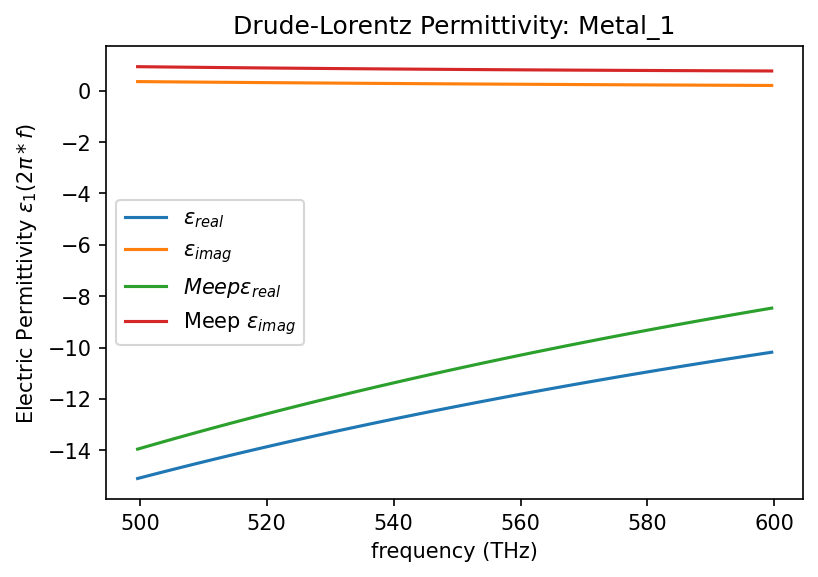

In [52]:
#setting up the material first
import wave
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
from meep.materials import Ag_visible as meep_metal

wp = 1.26e+16
gamma = 7.0e+13



def epsilon_drude_lorentz(w,wp,gamma):
    return 1- (wp**2)/(w*(w+1j*gamma))

meep_unit_lengt = constants.micro
meep_unit_time = constants.micro/constants.c



max_wavelength =  .6*meep_unit_lengt
min_wavelength =  .5*meep_unit_lengt


frequency = np.linspace(constants.c/max_wavelength,
                            constants.c/min_wavelength, 100 )
frequency_THz = frequency/constants.tera
omega_THz = 2.0*np.pi*frequency_THz
frequency_meep = frequency*meep_unit_time

eps_1 = epsilon_drude_lorentz(omega_THz*constants.tera,wp,gamma)

ep_Al_meep = meep_metal.epsilon(frequency_meep)[:,0,0]
fig, ax1 =   plt.subplots(dpi=150)                               

ax1.plot(frequency_THz,np.real(eps_1), label=r'$\epsilon_{real}$')
ax1.plot(frequency_THz,np.imag(eps_1), label=r'$\epsilon_{imag}$')
ax1.plot(frequency_THz,np.real(ep_Al_meep), label=r'$Meep \epsilon_{real}$')
ax1.plot(frequency_THz,np.imag(ep_Al_meep), label=r'Meep $\epsilon_{imag}$')
ax1.set_xlabel( r'frequency (THz)' )
ax1.set_ylabel(r'Electric Permittivity $\epsilon_1(2\pi*f)$')
ax1.set_title('Drude-Lorentz Permittivity: Metal_1')
ax1.legend()
plt.show()